In [1]:
import os
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
def preprocess_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        tokens = word_tokenize(text)
        
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]
        
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
        preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [3]:
# Define the directory where the 10-K reports are located
base_directory = "D:/Fintech_lab"
tickers = ["AXP", "MA", "V"]

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [4]:
# Create a dictionary to store TF-IDF matrices for each ticker and report
tfidf_matrices = {}

# Initialize overall minimum shape to positive infinity
overall_min_shape = float('inf')

# Loop through tickers for comparison
for ticker in tickers:
    ticker_directory = os.path.join(base_directory, ticker)
    print(f"Processing reports for {ticker}:")
    
    # Read and preprocess the 10-K reports for the ticker
    reports = {}
    min_shape = float('inf')  # Initialize minimum shape to positive infinity
    for file_name in os.listdir(ticker_directory):
        if file_name.endswith(".txt"):
            file_path = os.path.join(ticker_directory, file_name)
            report_text = preprocess_text(file_path)
            tfidf_matrix = vectorizer.fit_transform([report_text])
            reports[file_name] = (report_text, tfidf_matrix)
            
            # Update minimum shape if the current matrix shape is smaller
            current_shape = tfidf_matrix.shape[1]
            if current_shape < min_shape:
                min_shape = current_shape
    
    # Update overall minimum shape if the minimum shape for this ticker is smaller
    if min_shape < overall_min_shape:
        overall_min_shape = min_shape
    
    # Store TF-IDF matrices for the ticker
    tfidf_matrices[ticker] = reports
    
    # Display the minimum shape for the ticker
    print(f"Minimum shape for {ticker}: {min_shape}\n")

# Display the overall minimum shape across all tickers
print(f"\nOverall minimum shape across all tickers: {overall_min_shape}")

# Display the TF-IDF matrices for each ticker and report
for ticker, reports in tfidf_matrices.items():
    print(f"\nTF-IDF matrices for {ticker}:")
    for report_name, (_, tfidf_matrix) in reports.items():
        print(f"TF-IDF matrix for {report_name}: {tfidf_matrix.shape}")


Processing reports for AXP:
Minimum shape for AXP: 3548

Processing reports for MA:
Minimum shape for MA: 2879

Processing reports for V:
Minimum shape for V: 3400


Overall minimum shape across all tickers: 2879

TF-IDF matrices for AXP:
TF-IDF matrix for 20161231.txt: (1, 3584)
TF-IDF matrix for 20171231.txt: (1, 3576)
TF-IDF matrix for 20181231.txt: (1, 3548)
TF-IDF matrix for 20191231.txt: (1, 3753)
TF-IDF matrix for 20201231.txt: (1, 3927)
TF-IDF matrix for 20211231.txt: (1, 3977)
TF-IDF matrix for 20221231.txt: (1, 3933)
TF-IDF matrix for 20231231.txt: (1, 3997)

TF-IDF matrices for MA:
TF-IDF matrix for 20161231.txt: (1, 2879)
TF-IDF matrix for 20171231.txt: (1, 3031)
TF-IDF matrix for 20181231.txt: (1, 3104)
TF-IDF matrix for 20191231.txt: (1, 3008)
TF-IDF matrix for 20201231.txt: (1, 3477)
TF-IDF matrix for 20211231.txt: (1, 3515)
TF-IDF matrix for 20221231.txt: (1, 3591)
TF-IDF matrix for 20231231.txt: (1, 3594)

TF-IDF matrices for V:
TF-IDF matrix for 20160930.txt: (1, 3503

In [5]:
# Create a dictionary to store TF-IDF matrices for each ticker and report
tfidf_matrices = {}

# Loop through tickers for comparison
for ticker in tickers:
    ticker_directory = os.path.join(base_directory, ticker)
    print(f"Processing reports for {ticker}:")
    
    # Read and preprocess the 10-K reports for the ticker
    reports = {}
    for file_name in os.listdir(ticker_directory):
        if file_name.endswith(".txt"):
            file_path = os.path.join(ticker_directory, file_name)
            report_text = preprocess_text(file_path)
            tfidf_matrix = vectorizer.fit_transform([report_text])
            reports[file_name] = (report_text, tfidf_matrix)
    
    # Convert all TF-IDF matrices for this ticker to overall minimum shape
    for report_name, (_, tfidf_matrix) in reports.items():
        if tfidf_matrix.shape != (1, overall_min_shape):
            tfidf_matrix = tfidf_matrix[:, :int(overall_min_shape)]
            tfidf_matrix.resize((1, int(overall_min_shape)))  # Resize to (1, overall_min_shape)
            reports[report_name] = (reports[report_name][0], tfidf_matrix)
    
    # Store TF-IDF matrices for the ticker
    tfidf_matrices[ticker] = reports

# Display the overall minimum shape across all tickers
print(f"\nOverall minimum shape across all tickers: (1, {overall_min_shape})")

# Display the TF-IDF matrices for each ticker and report
for ticker, reports in tfidf_matrices.items():
    print(f"\nTF-IDF matrices for {ticker}:")
    for report_name, (_, tfidf_matrix) in reports.items():
        print(f"TF-IDF matrix for {report_name}: {tfidf_matrix.shape}")


Processing reports for AXP:
Processing reports for MA:
Processing reports for V:

Overall minimum shape across all tickers: (1, 2879)

TF-IDF matrices for AXP:
TF-IDF matrix for 20161231.txt: (1, 2879)
TF-IDF matrix for 20171231.txt: (1, 2879)
TF-IDF matrix for 20181231.txt: (1, 2879)
TF-IDF matrix for 20191231.txt: (1, 2879)
TF-IDF matrix for 20201231.txt: (1, 2879)
TF-IDF matrix for 20211231.txt: (1, 2879)
TF-IDF matrix for 20221231.txt: (1, 2879)
TF-IDF matrix for 20231231.txt: (1, 2879)

TF-IDF matrices for MA:
TF-IDF matrix for 20161231.txt: (1, 2879)
TF-IDF matrix for 20171231.txt: (1, 2879)
TF-IDF matrix for 20181231.txt: (1, 2879)
TF-IDF matrix for 20191231.txt: (1, 2879)
TF-IDF matrix for 20201231.txt: (1, 2879)
TF-IDF matrix for 20211231.txt: (1, 2879)
TF-IDF matrix for 20221231.txt: (1, 2879)
TF-IDF matrix for 20231231.txt: (1, 2879)

TF-IDF matrices for V:
TF-IDF matrix for 20160930.txt: (1, 2879)
TF-IDF matrix for 20170930.txt: (1, 2879)
TF-IDF matrix for 20180930.txt: (1,

In [6]:
# Dictionary to store the similarity values
similarity_dict = {}

# Compare TF-IDF matrices across all tickers
for ticker1, reports1 in tfidf_matrices.items():
    for ticker2, reports2 in tfidf_matrices.items():
        if ticker1 != ticker2:
            print(f"\nComparing TF-IDF matrices between {ticker1} and {ticker2}:")
            similarities = []
            for report_name1, (_, tfidf_matrix1) in reports1.items():
                for report_name2, (_, tfidf_matrix2) in reports2.items():
                    similarity = cosine_similarity(tfidf_matrix1, tfidf_matrix2)
                    similarities.append(similarity[0][0])
                    print(f"{report_name1} vs {report_name2}: {similarity[0][0]}")
            similarity_dict[f"{ticker1}_{ticker2}"] = similarities



Comparing TF-IDF matrices between AXP and MA:
20161231.txt vs 20161231.txt: 0.146946090167384
20161231.txt vs 20171231.txt: 0.13468732574039147
20161231.txt vs 20181231.txt: 0.12029326098092177
20161231.txt vs 20191231.txt: 0.11987384276414136
20161231.txt vs 20201231.txt: 0.12631259373463333
20161231.txt vs 20211231.txt: 0.13376302123240447
20161231.txt vs 20221231.txt: 0.1028016188314862
20161231.txt vs 20231231.txt: 0.14442120105565026
20171231.txt vs 20161231.txt: 0.13937236342321974
20171231.txt vs 20171231.txt: 0.16295706546566355
20171231.txt vs 20181231.txt: 0.17803377356094782
20171231.txt vs 20191231.txt: 0.14113669321112085
20171231.txt vs 20201231.txt: 0.1280405328179807
20171231.txt vs 20211231.txt: 0.11620067131702669
20171231.txt vs 20221231.txt: 0.10519649134368772
20171231.txt vs 20231231.txt: 0.1259754319423607
20181231.txt vs 20161231.txt: 0.1536574873199778
20181231.txt vs 20171231.txt: 0.17843777896400462
20181231.txt vs 20181231.txt: 0.15002616414617886
20181231.

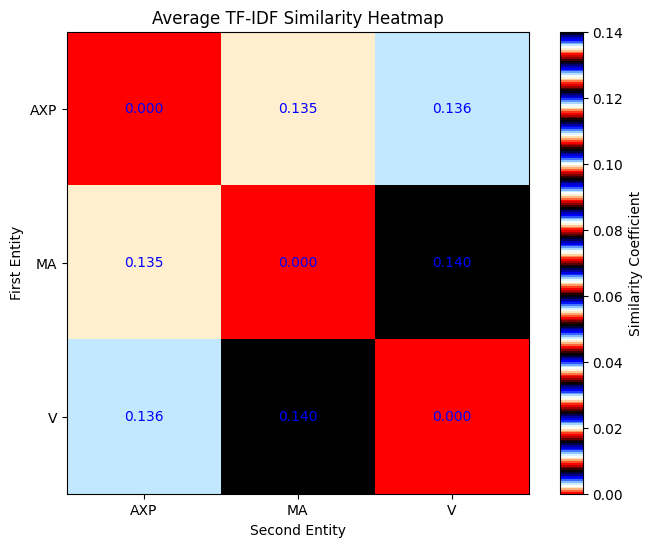

In [7]:
# Define the entities (e.g., AXP, MA, V)
entities = ['AXP', 'MA', 'V']

# Create a matrix to store the average similarity coefficients
matrix = np.zeros((len(entities), len(entities)))

# Fill in the matrix with the average similarity coefficients
for i, entity1 in enumerate(entities):
    for j, entity2 in enumerate(entities):
        if entity1 != entity2:
            key = f"{entity1}_{entity2}"
            values = similarity_dict[key]
            average_similarity = np.mean(values)
            matrix[i, j] = average_similarity

# Plot the heatmap with modified color scheme and formatting
plt.figure(figsize=(8, 6))
plt.imshow(matrix, cmap='flag', interpolation='nearest')  # Changed colormap to 'viridis'
plt.colorbar(label='Similarity Coefficient')
plt.title('Average TF-IDF Similarity Heatmap')
plt.xticks(np.arange(len(entities)), entities)
plt.yticks(np.arange(len(entities)), entities)
plt.xlabel('Second Entity')
plt.ylabel('First Entity')

# Format the numbers to three decimal places
for i in range(len(entities)):
    for j in range(len(entities)):
        plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='blue')

plt.show()